In [9]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'
ORANGE = '#DE6A10'
PURPLE = '#773F9B'
YELLOW = '#DCBD23'

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
def ca(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', top='off', right='off', left='off',
    labelbottom='off', labelleft='off') # labels along the bottom edge are off
    

def center(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom='off', labelleft='off')
    
    ax.set_aspect('equal')
    


/home/peter/anaconda3/lib/python3.5/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/peter/anaconda3/lib/python3.5/site-packages/ipykernel/pylab/config.py:44: DeprecationWarning: InlineBackend._config_changed is deprecated: use @observe and @unobserve instead.
  def _config_changed(self, name, old, new):
/home/peter/anaconda3/lib/python3.5/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


Using TensorFlow backend.


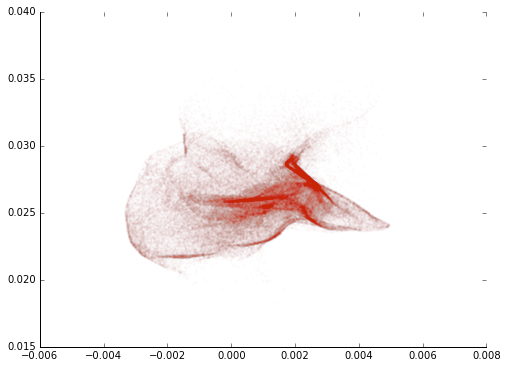

In [2]:
# good seeds: 60

np.random.seed(60)

import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(100, input_dim=2, activation='sigmoid'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(2))

n = 100000

x = np.random.randn(n, 2)
y = model.predict(x)

plt.figure(figsize=(8, 6))
plt.scatter(y[:, 0], y[:, 1], color=RED, s=2, alpha=0.01)
clean()

plt.savefig('random.pdf')

(13233, 62, 47)


/home/peter/anaconda3/lib/python3.5/site-packages/matplotlib/backends/backend_pdf.py:1264: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba = np.fromstring(s, np.uint8)


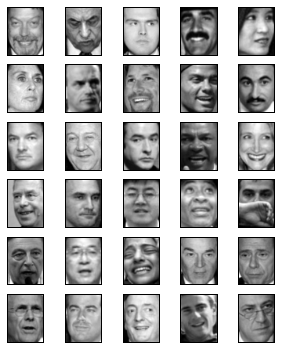

In [93]:
import warnings
warnings.filterwarnings(action='once')

from sklearn import datasets
# faces = datasets.fetch_olivetti_faces()
faces = datasets.fetch_lfw_people(data_home='.')

print(faces.images.shape)

# plot several images
fig = plt.figure(figsize=(5, 6))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i, :, :], cmap='gray')
    
plt.savefig('faces.pdf')

xd = faces.images[:, :, :, None]/255.

In [45]:
import math
math.sqrt(2914)

53.98147830506312

In [74]:
from keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Reshape, MaxPooling2D, UpSampling2D, Flatten, Cropping2D
from keras.models import Model

hidden_size = 64

input = Input(shape=(62,47,1))

x = Conv2D(4, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))(input)
x = MaxPooling2D((4, 4), padding='same')(x)
x = Conv2D(32, (4, 4), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (4, 4), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(hidden_size)(x)

encoder = Model(input, x)

encoder.summary()

encoded = Input(shape=(hidden_size,))

x = Dense(768)(encoded)
x = Reshape((4,3,64))(x)

x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((4, 4))(x)
x = Conv2D(1, (4, 4), activation='sigmoid', padding='same')(x)
decoded = Cropping2D(cropping=((1, 1), (0, 1)))(x)

decoder = Model(encoded, decoded)

decoder.summary()

auto = Model(input, decoder(encoder(input)))

auto.summary()

/home/peter/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/tensor_util.py:560: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(tensor.tensor_content, dtype=dtype).reshape(shape)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 62, 47, 1)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 62, 47, 4)         40        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 12, 4)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 6, 32)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 8, 6, 64)          32832     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 3, 64)          0         
__________

/home/peter/anaconda3/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))


In [85]:
from keras.optimizers import SGD, Adam

auto.compile(optimizer='adam', loss='binary_crossentropy')

/home/peter/anaconda3/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/peter/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/tensor_util.py:560: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(tensor.tensor_content, dtype=dtype).reshape(shape)


In [94]:
auto.fit(xd, xd, epochs=100, batch_size=256, shuffle=True)

Epoch 1/100
13233/13233 [==============================] - 179s 14ms/step - loss: 0.6286
Epoch 2/100
13233/13233 [==============================] - 175s 13ms/step - loss: 0.6286
Epoch 3/100
13233/13233 [==============================] - 174s 13ms/step - loss: 0.6286
Epoch 4/100
13233/13233 [==============================] - 174s 13ms/step - loss: 0.6284
Epoch 5/100
13233/13233 [==============================] - 173s 13ms/step - loss: 0.6285
Epoch 6/100
13233/13233 [==============================] - 174s 13ms/step - loss: 0.6283
Epoch 7/100
13233/13233 [==============================] - 177s 13ms/step - loss: 0.6284
Epoch 8/100
13233/13233 [==============================] - 174s 13ms/step - loss: 0.6282
Epoch 9/100
13233/13233 [==============================] - 174s 13ms/step - loss: 0.6283
Epoch 10/100
13233/13233 [==============================] - 174s 13ms/step - loss: 0.6281
Epoch 11/100
13233/13233 [==============================] - 175s 13ms/step - loss: 0.6282
Epoch 12/100
13233/

KeyboardInterrupt: 

[ 3.15257348e-02 -2.76773982e-02 -3.23399901e-01 -4.83889043e-01
 -2.33941469e-02 -2.76589338e-02 -4.30324823e-02 -8.35226774e-02
  3.01103592e-02 -2.56004296e-02  4.31092829e-02 -2.37832181e-02
  5.02466932e-02  2.84016460e-01 -3.65310488e-03  3.77643853e-03
  1.40841147e-02 -1.06718823e-01 -2.43566871e-01 -2.21293420e-02
  3.28405946e-02 -1.81337651e-02  9.40921381e-02 -8.30629375e-03
  2.66053881e-02 -4.47300076e-01  5.80457561e-02 -9.22107622e-02
  8.09275061e-02  8.25899187e-04  1.21301435e-01 -6.98262602e-02
 -3.53434645e-02  3.05996966e-02 -7.51084983e-02  2.55773902e-01
  2.03630216e-02 -6.67936401e-03 -2.20088176e-02  1.25517603e-02
 -9.69850738e-03 -2.53723949e-01 -5.56555055e-02 -8.86063054e-02
 -4.23403867e-02  6.79144561e-02  6.14892691e-03  9.90767255e-02
  1.09095998e-01 -4.56545167e-02 -4.13376018e-02  2.09785141e-02
 -3.10376734e-02 -1.67309955e-01  1.72909033e-02 -5.29546514e-02
 -1.09784566e-01 -4.30121534e-02  1.16144824e+00 -1.31233156e-01
 -5.40573010e-03  1.80398

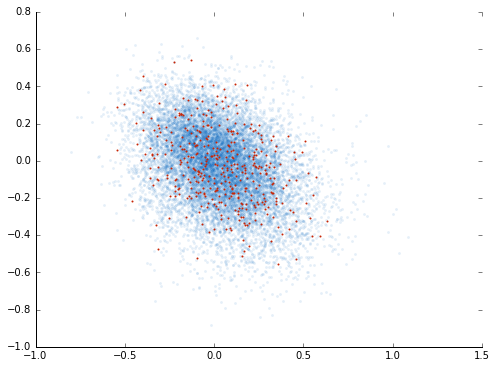

In [95]:
latent = encoder.predict(xd)

plt.figure(figsize=(8,6))
plt.scatter(latent[:,0], latent[:,1], linewidth=0, color=BLUE, s=8, alpha=0.1)

mean = np.mean(latent, axis=0)
cov = np.cov(latent.T)

print(mean, cov)

sample = np.random.multivariate_normal(mean, cov, 400)
plt.scatter(sample[:,0], sample[:,1], linewidth=0, color=RED, s=4, alpha=1)

clean()

/home/peter/anaconda3/lib/python3.5/site-packages/matplotlib/backends/backend_pdf.py:1264: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  rgba = np.fromstring(s, np.uint8)


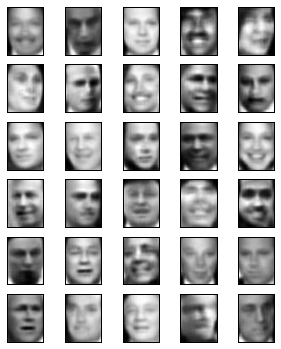

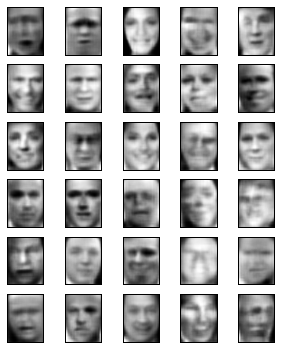

In [96]:
out = decoder.predict(latent[:400, :])
out = out.reshape(400, 62, 47)

fig = plt.figure(figsize=(5, 6))

# plot several images
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(out[i, :, :], cmap=plt.cm.gray)
    
plt.savefig('faces-reconstructed.pdf')

out = decoder.predict(sample)
out = out.reshape(400, 62, 47)

fig = plt.figure(figsize=(5, 6))

# plot several images
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(out[i, :, :], cmap=plt.cm.gray)
    
plt.savefig('faces-generated.pdf')